# 🏅 Exploration 18 Main Project : OCR 3대장 중 누가 이길까! 🏅

## 🎯 루브릭 살펴보기 🎯

|루브릭 평가항목|세부기준|
|------|---|
|OCR을 활용하여 구현하려는 서비스의 기획이 적당한가?|목표로 하는 서비스가 OCR을 적용 가능하며, 활용했을 때 더욱 유용함을 보일 수 있음|
|모델 평가기준이 명확하고 체계적인가?|평가 기준에 부합하는 테스트 데이터의 특징을 명확하게 제시함|
|평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과를 정리했는가?|테스트 이미지를 사용해 제시된 평가 기준에 따른 테스트 결과를 기반으로 결론을 도출함|

## 🎆 프로젝트 순서 🎆

1. OCR이란?
2. 서비스 기획 (루브릭 1번)
3. 모델 평가 기준 (루브릭 2번)
4. OCR 3대장 테스트 이미지에 주입하기
5. 결과 분석 (루브릭 3번)
6. 프로젝트 회고

## 1. OCR이란?

- OCR은 **광학식 문자 판독기**로 문서에 새겨진 문자를 빛을 이용하여 판독하는 장치이다.
- 보통 특정 형태로 타이핑된 문자를 판독하는 경우가 많다.
- OCR의 기본적인 개념을 간단하지만 재밌게 살펴볼 수 있는 영상을 통해 OCR 기술이 대략 어떻게 써먹는지 살펴보면 좋다!
(https://www.youtube.com/watch?v=u6D_l2A0JXY)

## 2. 서비스 기획 (루브릭 1번)

- 서비스 이름 : **달라 달라 YEAH! 개성파 텍스트 판독 OCR**
- 서비스 요약 : 서로 다른 글씨체로 구성된 후보 이미지를 과연 OCR 모델이 얼마나 잘 읽어낼 수 있을까?

## 3. 모델 평가 기준 (루브릭 2번)

- 서로 다른 글씨체를 담은 이미지를 대상으로 평가한다.

## 4. OCR 3대장 테스트 이미지에 주입하기

### 1) 후보 이미지 확인

- OCR 모델들이 판독할 후보 이미지를 확인한다.

In [1]:
from google.cloud import vision
import io
import os
 
img_dir = os.getenv('HOME')+'/aiffel/ocr_python'
file_list = os.listdir(img_dir)
file_list

['1.jpg', '2.jpg', '3.jpg', '5.jpg', '6.jpg']

### 2) Google OCR API

In [2]:
def detect_text(path):
    """Detects text in the file."""
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [3]:
# 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# !ls -l $GOOGLE_APPLICATION_CREDENTIALS
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/aiffel_project_ksm/my_google_api_key.json'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
for file in file_list:
    print(f'[{file}]')
    detect_text(os.path.join(img_dir, file))
    print()

[1.jpg]
Texts:

"외파인하우스
Full-Gption
w/OILIS
House
(02)337-2385
3F
O WINNERS DANCE
VILI ARe
02-324-5532
HIAME
MOTOVELO I 9E4E
"

"외"

"파인"

"하우스"

"Full-Gption"

"w/OILIS"

"House"

"(02)337-2385"

"3F"

"O"

"WINNERS"

"DANCE"

"VILI"

"ARe"

"02-324-5532"

"HIAME"

"MOTOVELO"

"I"

"9E4E"
bounds: (320,318),(376,319),(376,341),(320,340)

[2.jpg]
Texts:

"Coconut Smoothie
Story
>cafe, 마 시 다
010-4610-4591
SERN
앙상불
"

"Coconut"

"Smoothie"

"Story"

">"

"cafe"

","

"마"

"시"

"다"

"010-4610-4591"

"SERN"

"앙상불"
bounds: (135,414),(167,416),(166,433),(134,431)

[3.jpg]
Texts:

"Nail
Jin
진.네일
"

"Nail"

"Jin"

"진"

"."

"네일"
bounds: (296,256),(326,261),(322,280),(293,275)

[5.jpg]
Texts:

"Auto, Ability
"

"Auto,"

"Ability"
bounds: (360,164),(603,104),(629,209),(386,269)

[6.jpg]
Texts:

"bannan
"

"bannan"
bounds: (229,237),(386,285),(381,299),(225,251)



### 3) Keras-OCR

In [4]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [5]:
images = [keras_ocr.tools.read(os.path.join(img_dir, file)) for file in file_list]
prediction_groups = [pipeline.recognize([os.path.join(img_dir, file)]) for file in file_list]

- 이미지 위에 직접 Keras-OCR을 적용한 문자 인식 결과를 확인해 본다.

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


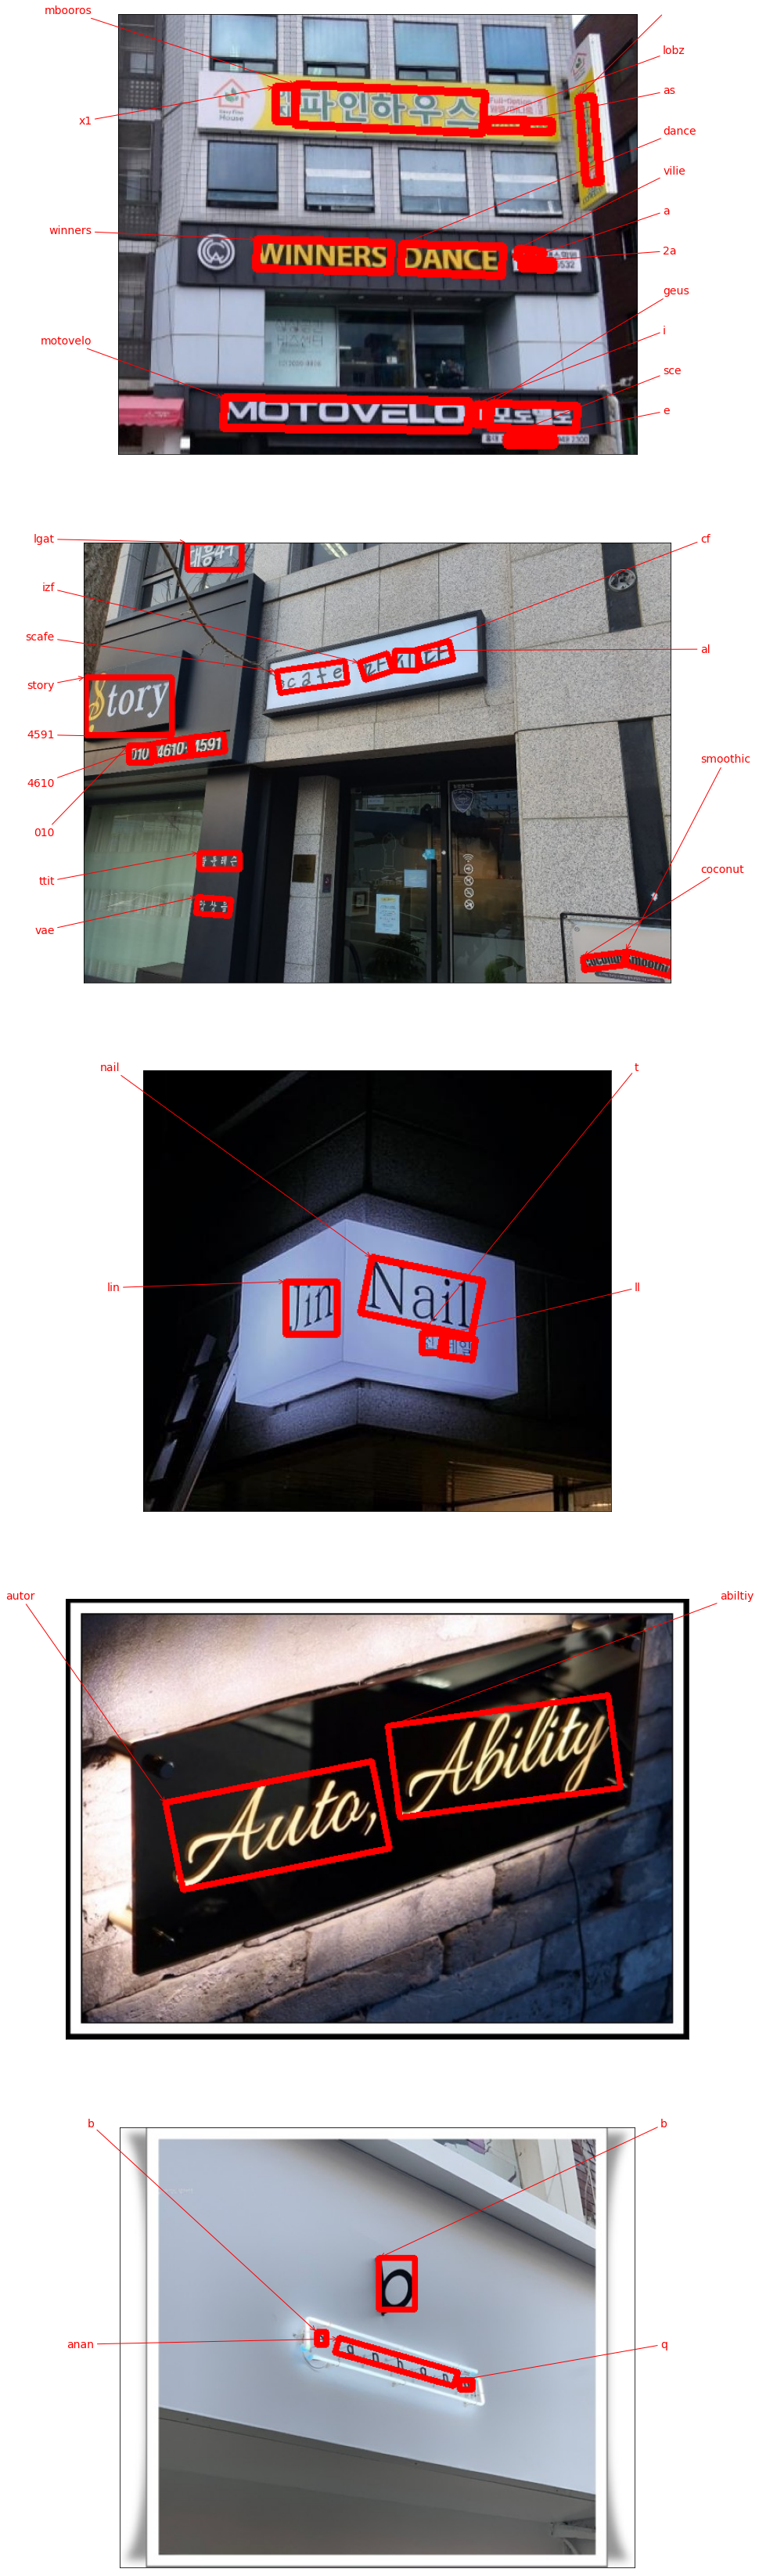

In [6]:
fig, axs = plt.subplots(nrows=len(images), figsize=(40, 60))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### 4) Tesseract

In [7]:
import pytesseract
from PIL import Image
from pytesseract import Output

def recognize_images(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")

            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1

    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

In [8]:
save_dir = os.getenv('HOME')+'/aiffel/ocr_python/tesseract_cropped'

for file in file_list:
    print(f'[{file}]')
    try:
        recognize_images(os.path.join(img_dir, file), save_dir)
    except:
        print(f'Cannot recognize characters from {file}')

[1.jpg]
|

a



oe

J Pay


z

Done
[2.jpg]
= - \

Done
[3.jpg]

Done
[5.jpg]
Cannot recognize characters from 5.jpg
[6.jpg]

Done


## 5. 결과 분석 (루브릭 3번)

- 이제, OCR 모델의 우월을 판단하기 위한 분석을 진행해 본다.
- 이미지에 따른 OCR 모델 비교를 위해 **compare_ocr** 함수를 정의해 놓는다.

In [9]:
def compare_ocr(file):
    print('[Keras-OCR]')
    idx = file_list.index(file)
    keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
    plt.show()
    print('\n[Google OCR]')
    detect_text(os.path.join(img_dir, file))
    print('\n[Tesseract]')
    recognize_images(os.path.join(img_dir, file), save_dir)

### 🤍 첫 번째 후보 이미지 🤍

[Keras-OCR]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


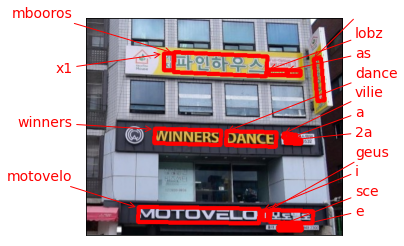


[Google OCR]
Texts:

"외파인하우스
Full-Gption
w/OILIS
House
(02)337-2385
3F
O WINNERS DANCE
VILI ARe
02-324-5532
HIAME
MOTOVELO I 9E4E
"

"외"

"파인"

"하우스"

"Full-Gption"

"w/OILIS"

"House"

"(02)337-2385"

"3F"

"O"

"WINNERS"

"DANCE"

"VILI"

"ARe"

"02-324-5532"

"HIAME"

"MOTOVELO"

"I"

"9E4E"
bounds: (320,318),(376,319),(376,341),(320,340)

[Tesseract]
|

a



oe

J Pay


z

Done


In [10]:
compare_ocr('1.jpg')

### 💚 두 번째 후보 이미지 💚

[Keras-OCR]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


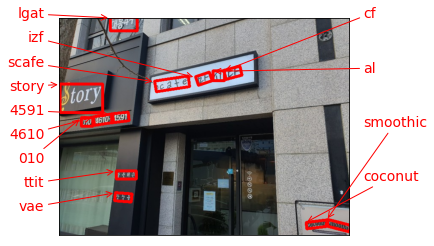


[Google OCR]
Texts:

"Coconut Smoothie
Story
>cafe, 마 시 다
010-4610-4591
SERN
앙상불
"

"Coconut"

"Smoothie"

"Story"

">"

"cafe"

","

"마"

"시"

"다"

"010-4610-4591"

"SERN"

"앙상불"
bounds: (135,414),(167,416),(166,433),(134,431)

[Tesseract]
= - \

Done


In [11]:
compare_ocr('2.jpg')

### 🧡 세 번째 후보 이미지 🧡

[Keras-OCR]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


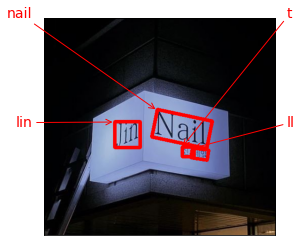


[Google OCR]
Texts:

"Nail
Jin
진.네일
"

"Nail"

"Jin"

"진"

"."

"네일"
bounds: (296,256),(326,261),(322,280),(293,275)

[Tesseract]

Done


In [12]:
compare_ocr('3.jpg')

### 💛 네 번째 후보 이미지 💛

[Keras-OCR]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


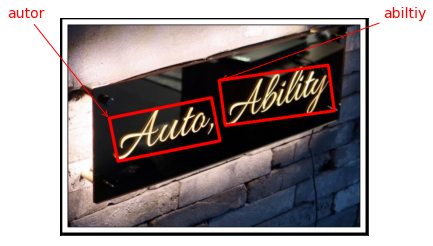


[Google OCR]
Texts:

"Auto, Ability
"

"Auto,"

"Ability"
bounds: (360,164),(603,104),(629,209),(386,269)

[Tesseract]


SystemError: tile cannot extend outside image

In [13]:
compare_ocr('5.jpg')

### 🤎 다섯 번째 후보 이미지 🤎

[Keras-OCR]


/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


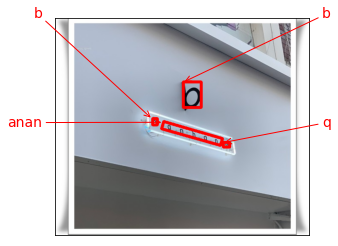


[Google OCR]
Texts:

"bannan
"

"bannan"
bounds: (229,237),(386,285),(381,299),(225,251)

[Tesseract]

Done


In [14]:
compare_ocr('6.jpg')

- 결과를 분석한 내용을 표로 정리하면 다음과 같다. 인식수준에 대해서는 **'상', '중' '하'로 자체 평가**한다.
- **'상'** : 핵심적이거나 눈에 띄는 텍스트를 오탈자 없이 대체로 정확하게 인식했다고 판단되는 경우에 부여하였다.
- **'중'** : '상' 정도의 수준에는 미치지 못했지만, 대체로 텍스트를 그럴듯하게 인식했다고 판단되는 경우에 부여하였다.
- **'하'** : 위의 조건들에 모두 해당하지 않거나, 에러가 발생한 경우에 부여하였다.

|이미지 순번|Google OCR 인식수준|Keras-OCR 인식수준|Tesseract 인식수준|
|-----------|-------------------|------------------|------------------|
|첫 번째|상|중|하|
|두 번째|상|상|하|
|세 번째|상|하|하|
|네 번째|상|중|하|
|다섯 번째|중|중|하|

- 자체적으로 원본 이미지와 비교하여 평가한 결과, OCR 3대장 중에 가장 다섯 개의 이미지의 텍스트 인식을 잘 해낸 모델은 **Google OCR**이었다! 👏👏
- 세 번째 이미지에서 Keras-OCR도 제 몫을 해내지 못하는 모습이 보였다. 비슷한 크기의 글자 Nail은 정확히 해석해냈으나, 나머지 텍스트를 정확하게 인식해내지 못하였다.
- 특히, 다섯 번째 이미지에서는 전반적으로 좋은 결과를 보여주지 못했다. **Tesseract는 당연히 논외였고(😥)** 원본 이미지에서 작은 글씨 부분을 읽었을 때 banhana라고 읽어주길 바랐는데, 안타깝게도 **Keras-OCR은 bananq로, Google OCR은 bannan이라고 잘못 인식**했다. 아무래도 그동안 잘 인식해오던 Google OCR도 매우 작은 크기의 텍스트를 인식하는 데는 쉽지 않았던 것 같다.
- 모든 이미지에서 Tesseract의 텍스트 인식수준이 다른 두 OCR 모델에 비해 현저히 낮았다.
- 그렇다면 Tesseract 모델은 정말 쓸모가 없는 모델인 걸까? 이것은 의문으로 남는다.

## 6. 프로젝트 회고

- 기본적으로 **어떠한 이미지를 사용하느냐에 따라 OCR 모델이 텍스트를 인식하는 수준이 달라질 수 있다**는 점을 알게 되었다.
- 매우 작게 보이는 글씨 앞에서는 Google OCR도 인식하기가 쉽지만은 않았던 것 같다.
- **Tesseract 모델이, 본 프로젝트에서 언급된 다른 두 OCR 모델보다 많이 부족한 모델인건지, 아니면 다른 이유가 있는지에 대해 의문과 호기심을 갖게 되었다.**
- 지금까지 해 본 CV 프로젝트 중에서 가장 인상깊고 재밌게 한 프로젝트였다!! 사실 이게 제일 중요하다! 😍😍